## Probability


In [1]:
# sample example in the code 
# Total number of outcomes
total_outcomes = 6

# Number of favorable outcomes (rolling a 3)
favorable_outcomes = 1

# Probability of rolling a 3
probability = favorable_outcomes / total_outcomes
print(f"The probability of rolling a 3 is: {probability}")

The probability of rolling a 3 is: 0.16666666666666666


## Bayesian versus Frequentist

In [2]:
# Question: we have to calculate the number of way person can come back, which doesnot really make sense at all!! So we have to use approach of Bayesian 
# Let say 1458 unique visitors in pask week 452 were repeat visitor.

total_visitors = 1458

# Number of repeat visitors
repeated_visitor = 452

# Probability of repeated visitor
probability = repeated_visitor / total_visitors
print(f"{probability*100} % of yours visitors are repeated visitors")

31.001371742112482 % of yours visitors are repeated visitors


## Law of natural number

In [3]:
# answer
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

%matplotlib inline


results = []

for n in range(1, 10000):
    nums = np.random.randint(low=1, high=10, size=n)
    mean = nums.mean()
    results.append(mean)

df = pd.DataFrame({'means': results})
print("when small number of data\n",df.head())
print("when we increase data\n",df.tail())

when small number of data
    means
0   8.00
1   8.00
2   4.00
3   8.25
4   6.00
when we increase data
          means
9994  5.034917
9995  5.007203
9996  5.028409
9997  4.959892
9998  5.042804


Text(0, 0.5, 'Average of sample')

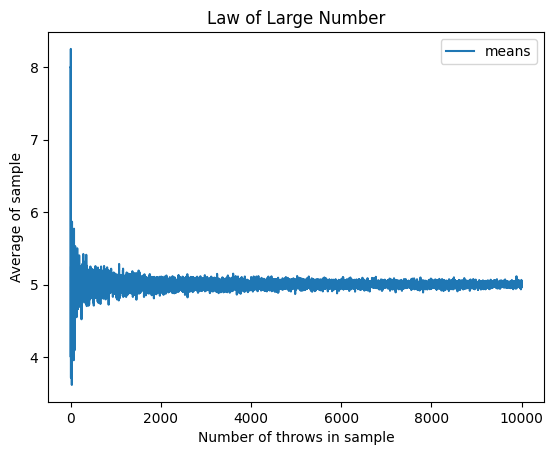

In [4]:
df.plot(title="Law of Large Number")
plt.xlabel("Number of throws in sample")
plt.ylabel("Average of sample")

## Compound events

In [5]:
# A group of 100 observations, and each observation corresponds to whether a person likes banana and/or mango. We'll model the events as follows:

# Banana (B): Whether a person likes banana.
# Mango (M): Whether a person likes mango.
# We will calculate:

# P(B): Probability that a person likes banana.
# P(M): Probability that a person likes mango.
# P(B AND M): Probability that a person likes both banana and mango.
# P(B OR M): Probability that a person likes either banana, mango, or both.


import pandas as pd
import numpy as np

# Simulating a dataset of 100 people
np.random.seed(42)

# Assume 60% like bananas, 50% like mangoes
# We'll create random data for the two events: 'Banana' and 'Mango'
data = {
    'Banana': np.random.choice([True, False], size=100, p=[0.6, 0.4]),  # 60% like banana
    'Mango': np.random.choice([True, False], size=100, p=[0.5, 0.5])   # 50% like mango
}

# Creating a DataFrame
df = pd.DataFrame(data)

# View the first few rows of the dataset
df.head()

# Count the number of occurrences for each combination of events
P_banana_and_mango = len(df[(df['Banana'] == True) & (df['Mango'] == True)]) / len(df)  # Both banana and mango
P_banana_or_mango = len(df[(df['Banana'] == True) | (df['Mango'] == True)]) / len(df)  # Either banana or mango

# Print results

print(f"Probability of liking both Banana and Mango (P(B AND M)): {P_banana_and_mango:.2f}")
print(f"Probability of liking Banana or Mango (P(B OR M)): {P_banana_or_mango:.2f}")

Probability of liking both Banana and Mango (P(B AND M)): 0.28
Probability of liking Banana or Mango (P(B OR M)): 0.84


## Conditional Probability


In [6]:
# Define the sample space for two coin tosses
sample_space = ['HH', 'HT', 'TH', 'TT']

# Define the events:
# Event A: First toss is a Head
event_A = [outcome for outcome in sample_space if outcome[0] == 'H']

# Event B: Second toss is a Tail
event_B = [outcome for outcome in sample_space if outcome[1] == 'T']

# Event A ∩ B: First toss is a Head AND second toss is a Tail
event_A_and_B = [outcome for outcome in sample_space if outcome[0] == 'H' and outcome[1] == 'T']

# Print the events
print("Sample Space:", sample_space)
print("Event A (First toss is a Head):", event_A)
print("Event B (Second toss is a Tail):", event_B)
print("Event A ∩ B (First toss is a Head and second toss is a Tail):", event_A_and_B)

Sample Space: ['HH', 'HT', 'TH', 'TT']
Event A (First toss is a Head): ['HH', 'HT']
Event B (Second toss is a Tail): ['HT', 'TT']
Event A ∩ B (First toss is a Head and second toss is a Tail): ['HT']


In [7]:
# Calculate P(A ∩ B) and P(B)
P_A_and_B = len(event_A_and_B) / len(sample_space)
P_B = len(event_B) / len(sample_space)

# Conditional Probability P(A|B)
P_A_given_B = P_A_and_B / P_B

# Print the result
print(f"Conditional Probability P(A|B) = {P_A_given_B:.2f}")

Conditional Probability P(A|B) = 0.50


## Rules of Probability
1)Addition rule
2)Mutually exclusive
3)Multiplication rule

In [8]:
# The multiplication Law 

# Question: The scenario involves drawing two cards from a standard deck of 52 cards without replacement.
#  We'll calculate the probability of drawing an Ace followed by a King.

# Total number of cards in the deck
total_cards = 52

# Number of Aces in the deck
aces = 4

# Number of Kings in the deck
kings = 4

# Probability of drawing an Ace first
prob_ace = aces / total_cards

# After drawing an Ace, the total cards reduce by 1, and the Kings remain the same
prob_king_given_ace = kings / (total_cards - 1)

# Using the multiplication rule for dependent events
prob_ace_and_king = prob_ace * prob_king_given_ace

# Print the result
print(f"The probability of drawing an Ace followed by a King is: {prob_ace_and_king:.4f}")

The probability of drawing an Ace followed by a King is: 0.0060


## Bayesian Theorem

In [10]:
import pandas as pd

# Load the Titanic dataset
titanic = pd.read_csv('./titanic.csv')

# Select relevant columns
titanic = titanic[['Sex', 'Survived']]

# Total number of passengers
total_passengers = len(titanic)

# Calculate P(F): Probability of being female
female_count = len(titanic[titanic['Sex'] == 'female'])
p_female = female_count / total_passengers

# Calculate P(S): Probability of surviving
survived_count = len(titanic[titanic['Survived'] == 1])
p_survived = survived_count / total_passengers

# Calculate P(F | S): Probability of being female given survival
female_survived_count = len(titanic[(titanic['Sex'] == 'female') & (titanic['Survived'] == 1)])
p_female_given_survived = female_survived_count / survived_count

# Apply Bayes' Theorem: P(S | F)
p_survived_given_female = (p_female_given_survived * p_survived) / p_female

# Display the result
print(f"Probability of surviving given that the passenger is female: {p_survived_given_female:.4f}")

Probability of surviving given that the passenger is female: 0.7420


## Uniform distribution

[22.84063292 11.6827993  13.23257428 ... 25.2530698  14.02922992
 14.68388851]


(1.0, 50.0)

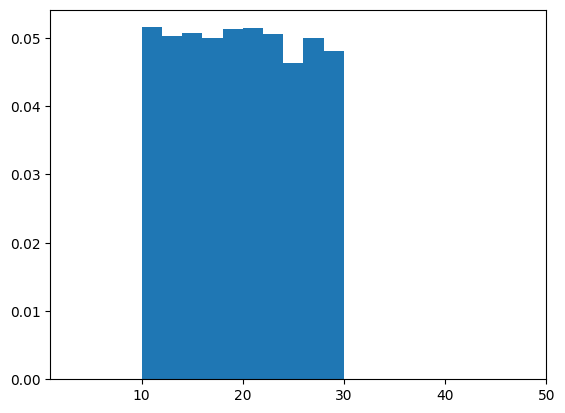

In [12]:
# import matplotlib
import matplotlib.pyplot as plt
#pip install scipy
# import uniform distribution
from scipy.stats import uniform

n = 10000
a = 10
width = 20 # b = 30

#rvs stands for random variates, which simply generate random numbers
#based on the distribution
data_uniform = uniform.rvs(size=n, loc=a, scale=width)

print(data_uniform)
#plot the data
plt.hist(data_uniform, density=True)  ##density=True makes sum=1
plt.xlim(1, 50)

#notice 1/(b-a) = 0.05

## Normal distribution

(array([1.42831901e-03, 1.38070837e-02, 7.85575454e-02, 2.43528391e-01,
        3.85289052e-01, 3.06255400e-01, 1.32476588e-01, 2.60668219e-02,
        2.73761143e-03, 1.19026584e-04]),
 array([-3.92240025, -3.0822518 , -2.24210335, -1.4019549 , -0.56180645,
         0.278342  ,  1.11849045,  1.9586389 ,  2.79878735,  3.6389358 ,
         4.47908425]),
 <BarContainer object of 10 artists>)

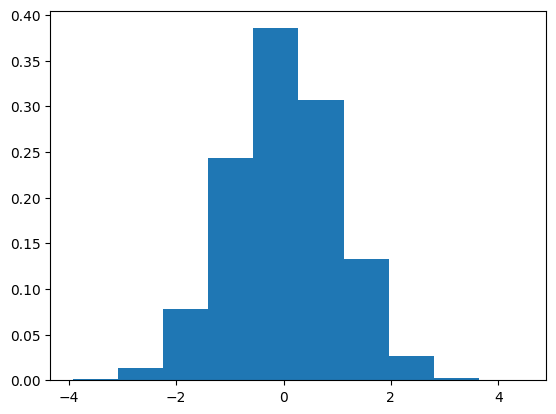

In [13]:
# import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import norm

# generate random numbers from mean = 0, std = 1
data_normal = norm.rvs(size=10000,loc=0,scale=1)

#plot the data
plt.hist(data_normal, density=True)  ##density=True makes sum=1

## Gamma Distribution

(array([0.29077647, 0.25488718, 0.12085168, 0.04101633, 0.01831086,
        0.00439461, 0.00146487, 0.        , 0.        , 0.00073243]),
 array([10.04155933, 11.40686927, 12.77217922, 14.13748916, 15.5027991 ,
        16.86810905, 18.23341899, 19.59872894, 20.96403888, 22.32934882,
        23.69465877]),
 <BarContainer object of 10 artists>)

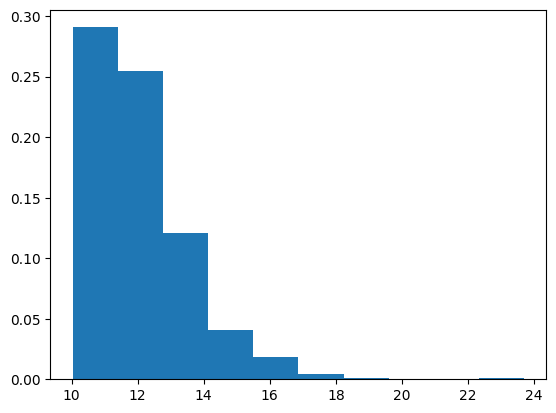

In [14]:
from scipy.stats import gamma
data_gamma = gamma.rvs(a=2, size=1000, loc=10, scale=1)  #loc simply shift

#plot the data
plt.hist(data_gamma, density=True)  ##density=True makes sum=1

## Exponential Distribution

(array([0.07700402, 0.03842423, 0.02131222, 0.00933382, 0.00435578,
        0.00248902, 0.00108895, 0.00062225, 0.00031113, 0.00062225]),
 array([1.10237878e-03, 6.42933817e+00, 1.28575740e+01, 1.92858097e+01,
        2.57140455e+01, 3.21422813e+01, 3.85705171e+01, 4.49987529e+01,
        5.14269887e+01, 5.78552245e+01, 6.42834603e+01]),
 <BarContainer object of 10 artists>)

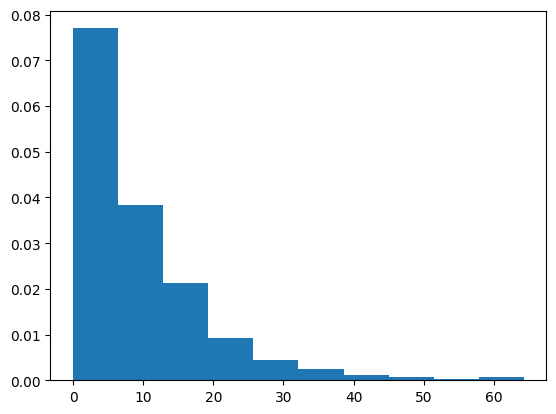

In [15]:
from scipy.stats import expon
data_expon = expon.rvs(scale=10,loc=0,size=1000)

#plot the data
plt.hist(data_expon, density=True)  ##density=True makes sum=1

## Poisson distribution

(array([0.00117391, 0.01152174, 0.04478261, 0.14243478, 0.1036087 ,
        0.0736087 , 0.04626087, 0.00904348, 0.00191304, 0.00043478]),
 array([ 0. ,  2.3,  4.6,  6.9,  9.2, 11.5, 13.8, 16.1, 18.4, 20.7, 23. ]),
 <BarContainer object of 10 artists>)

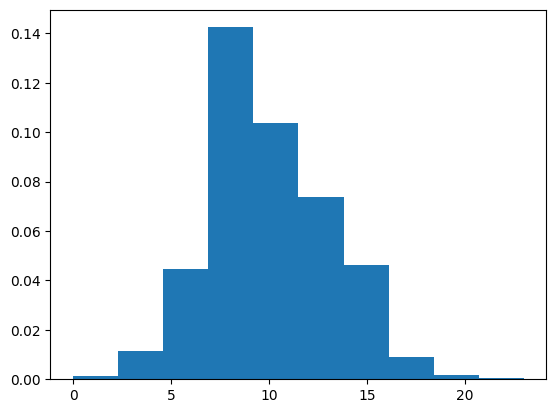

In [16]:
from scipy.stats import poisson
data_poisson = poisson.rvs(mu=10, size=10000)

#plot the data
plt.hist(data_poisson, density=True)  ##density=True makes sum=1

## Binomial Distribution

(array([0.00096, 0.00958, 0.0433 , 0.11839, 0.20399, 0.24582, 0.2057 ,
        0.11854, 0.0433 , 0.01042]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

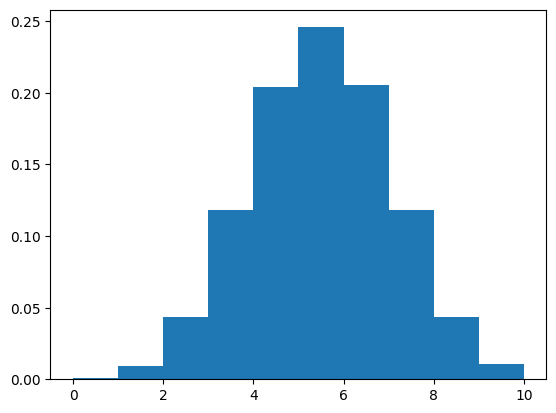

In [17]:
from scipy.stats import binom
data_binom = binom.rvs(n=10,p=0.5,size=100000)

#plot the data
plt.hist(data_binom, density=True)  ##density=True makes sum=1